<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#OLS-ANALYSIS" data-toc-modified-id="OLS-ANALYSIS-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>OLS ANALYSIS</a></span></li><li><span><a href="#OLS-Regression-with-robust-standard-errors" data-toc-modified-id="OLS-Regression-with-robust-standard-errors-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>OLS Regression with robust standard errors</a></span></li><li><span><a href="#Bootstrapped-standard-errors" data-toc-modified-id="Bootstrapped-standard-errors-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Bootstrapped standard errors</a></span></li></ul></div>

https://rlhick.people.wm.edu/posts/comparing-stata-and-ipython-commands-for-ols-models.html

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 8]
plt.style.use('fivethirtyeight')
%matplotlib inline

In [4]:
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf # for the ols and robust ols model
import statsmodels.graphics as smg
from statsmodels.compat import lzip

# Load data

In [6]:
df = pd.read_csv('tobias_koop_t_4.csv')
df.head()

,id,educ,ln_wage,pexp,time,ability,meduc,feduc,broken_home,siblings,pexp2
0,4,12,2.14,2,4,0.26,12,10,1,4,4
1,6,15,1.91,4,4,0.44,12,16,0,2,16
2,8,13,2.32,8,4,0.51,12,15,1,2,64
3,11,14,1.64,1,4,1.82,16,17,1,2,1
4,12,13,2.16,6,4,-1.30,13,12,0,5,36


In [7]:
df.describe()

,id,educ,ln_wage,pexp,time,ability,meduc,feduc,broken_home,siblings,pexp2
count,1034.000000,1034.000000,1034.000000,1034.000000,1034.0,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
mean,1090.951644,12.274662,2.138259,4.815280,4.0,0.016596,11.403288,11.585106,0.169246,3.200193,27.979691
std,634.891728,1.566838,0.466280,2.190298,0.0,0.920963,3.027277,3.735833,0.375150,2.126575,22.598790
min,4.000000,9.000000,0.420000,0.000000,4.0,-3.140000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,537.250000,12.000000,1.820000,3.000000,4.0,-0.550000,11.000000,10.000000,0.000000,2.000000,9.000000
50%,1081.500000,12.000000,2.120000,5.000000,4.0,0.170000,12.000000,12.000000,0.000000,3.000000,25.000000
75%,1666.500000,13.000000,2.450000,6.000000,4.0,0.720000,12.000000,14.000000,0.000000,4.000000,36.000000
max,2177.000000,19.000000,3.590000,12.000000,4.0,1.890000,20.000000,20.000000,1.000000,15.000000,144.000000


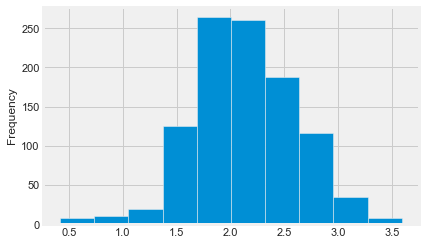

In [8]:
df.ln_wage.plot(kind='hist')

# OLS ANALYSIS
This is the model we'll be estimating the vector β from
$$
y_{i}=\beta_{0}+\beta_{1} e d u c_{i}+\beta_{2} p e x p_{i}+\beta_{3} p \exp _{i}^{2}+\beta_{4} \text {broken} \text {home}_{i}+\epsilon_{i}
$$

In [10]:
formula = "ln_wage ~ educ + pexp + pexp2 + broken_home"
results = smf.ols(formula,df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                ln_wage   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     51.36
Date:                Sun, 23 Jun 2019   Prob (F-statistic):           1.83e-39
Time:                        12:49:31   Log-Likelihood:                -583.66
No. Observations:                1034   AIC:                             1177.
Df Residuals:                    1029   BIC:                             1202.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4603      0.137      3.353      

# OLS Regression with robust standard errors

Recall that for robust standard errors, we first recover our OLS estimates (b) of β. Using b, construct e=y−xb. From there, calculate the robust variance/covariance matrix of estimated parameters as

$$
\operatorname{Var}(\mathbf{b})_{r b b u s t}=\left(\mathbf{x}^{\prime} \mathbf{x}\right)^{-1} \mathbf{x}^{\prime} \text { diag(ee }^{\prime} ) \mathbf{x}\left(\mathbf{x}^{\prime} \mathbf{x}\right)^{-1} \times \frac{N}{N-K}
$$

for calculating standard errors.

In [11]:
results_robust = results.get_robustcov_results(cov_type='HC1')
print(results_robust.summary())

                            OLS Regression Results                            
Dep. Variable:                ln_wage   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     64.82
Date:                Sun, 23 Jun 2019   Prob (F-statistic):           6.41e-49
Time:                        13:00:29   Log-Likelihood:                -583.66
No. Observations:                1034   AIC:                             1177.
Df Residuals:                    1029   BIC:                             1202.
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4603      0.132      3.500      

# Bootstrapped standard errors

In [12]:
R = 50

results_boot = np.zeros((R,results.params.shape[0]))

row_id = range(0,df.shape[0])

for r in range(R):
     this_sample = np.random.choice(row_id, size=df.shape[0], replace=True) # gives sampled row numbers
     # Define data for this replicate:    
     df_r = df.iloc[this_sample]   
     # Estimate model
     results_r = smf.ols(formula,df_r).fit(disp=0).params   
     # Store in row r of results_boot:
     results_boot[r,:] = np.asarray(results_r)   

In [13]:
# Convert results to pandas dataframe for easier analysis:
results_boot = pd.DataFrame(results_boot,columns=['b_Intercept','b_educ','b_pexp','pexp2','b_broken_home'])
results_boot.describe(percentiles=[.025,.975])

,b_Intercept,b_educ,b_pexp,pexp2,b_broken_home
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.454550,0.086102,0.201521,-0.012301,-0.010689
std,0.120591,0.010054,0.017633,0.001829,0.032821
min,0.234279,0.064596,0.157532,-0.015804,-0.101887
2.5%,0.264151,0.066869,0.160728,-0.015154,-0.087147
50%,0.454982,0.086288,0.203186,-0.012173,-0.007130
97.5%,0.682879,0.102807,0.229936,-0.008744,0.042403
max,0.720516,0.104417,0.238549,-0.007010,0.049151
